In [1]:
# Python 3
import jpeg as JPEG
import libs.ruidos as ruido
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from util import *

In [2]:
# img_show helpers
def img_matrix_show(mat_img, fg = (10,10)):
    plt.clf()
    plt.figure(figsize=fg)
    plt.grid(False)
    rows = len(mat_img)
    is_matrix = isinstance(mat_img[0], list)
    if is_matrix:
        cols = len(mat_img[0])
    else:
        cols = 1
    for i in range(rows):
        for j in range(cols):
            if is_matrix:
                plt.subplot(rows, cols, cols*i+(j+1))
                plt.imshow(mat_img[i][j])
            else:
                plt.subplot(cols, rows, cols*i+(j+1))
                plt.imshow(mat_img[j])
            plt.axis('off')
    plt.show()

In [3]:
def compression_rate(img, Q_factor):
    assert(0 < Q_factor and Q_factor <= 100)
    compressed_img = JPEG.jpeg_encode(img, Q_factor)
    return JPEG.img_size(img)/compressed_img.size()

def compress_and_get(img, Q_factor):
    compressed_img = JPEG.jpeg_encode(img, Q_factor)
    uncompressed_img = JPEG.jpeg_decode(compressed_img)
    return uncompressed_img, compressed_img.size()

In [4]:
img = io.imread('bmp/lena.bmp')

Me traigo todas las imágenes del la ruta *bmp/*, las como para probar la curva de compresion con diferentes imagenes.

In [16]:
from os import listdir
from os.path import isfile, join
ruta_imagenes = "bmp/"
imagenes = [f for f in listdir(ruta_imagenes) if isfile(join(mypath, f))]
print(imagenes)

['sun.bmp', 'no_homogenea.bmp', 'lena.bmp', 'lena_200x200.bmp', 'geom.bmp', 'text.bmp', 'vicunas.bmp']


In [26]:
Q_factor_values = np.arange(1,99,5)
compressed_img_sizes = np.empty(len(Q_factor_values), dtype=np.float)
compression_rates = np.empty(len(Q_factor_values), dtype=np.float)
all_compression_rates = np.zeros(\
                                 (len(imagenes),len(Q_factor_values)),\
                                 dtype=np.float\
                                )

j = 0 #variable para ir siguiendo el num de imagen que voy comprimiendo
for img_name in imagenes:
    img = io.imread(ruta_imagenes + img_name)
    img_size = JPEG.img_size(img)

    print("comprimiendo %s" % (img_name))
    
    compressed_img_sizes = np.empty(len(Q_factor_values), dtype=np.float)
    compression_rates = np.empty(len(Q_factor_values), dtype=np.float)
    
    for i in range(len(compressed_img_sizes)):
        print("comprimiento con Q_factor %.2f" % (Q_factor_values[i]))
        _, compressed_img_sizes[i] = compress_and_get(img,Q_factor_values[i])
        compression_rates[i] = img_size/compressed_img_sizes[i]
        
    all_compression_rates[j] = compression_rates
    j+=1

print(all_compression_rates)

comprimiendo sun.bmp
comprimiento con Q_factor 1.00
comprimiento con Q_factor 6.00
comprimiento con Q_factor 11.00
comprimiento con Q_factor 16.00
comprimiento con Q_factor 21.00
comprimiento con Q_factor 26.00
comprimiento con Q_factor 31.00
comprimiento con Q_factor 36.00
comprimiento con Q_factor 41.00
comprimiento con Q_factor 46.00
comprimiento con Q_factor 51.00
comprimiento con Q_factor 56.00
comprimiento con Q_factor 61.00
comprimiento con Q_factor 66.00
comprimiento con Q_factor 71.00
comprimiento con Q_factor 76.00
comprimiento con Q_factor 81.00
comprimiento con Q_factor 86.00
comprimiento con Q_factor 91.00
comprimiento con Q_factor 96.00
comprimiendo no_homogenea.bmp
comprimiento con Q_factor 1.00
comprimiento con Q_factor 6.00
comprimiento con Q_factor 11.00
comprimiento con Q_factor 16.00
comprimiento con Q_factor 21.00
comprimiento con Q_factor 26.00
comprimiento con Q_factor 31.00
comprimiento con Q_factor 36.00
comprimiento con Q_factor 41.00
comprimiento con Q_factor

In [27]:
np.save("pickles/muchos_CR.np", all_compression_rates)

Aca la idea es plotear para cada imagen, la curva de compresion que se obtuvo, como para mostrarlo para cierta variedad

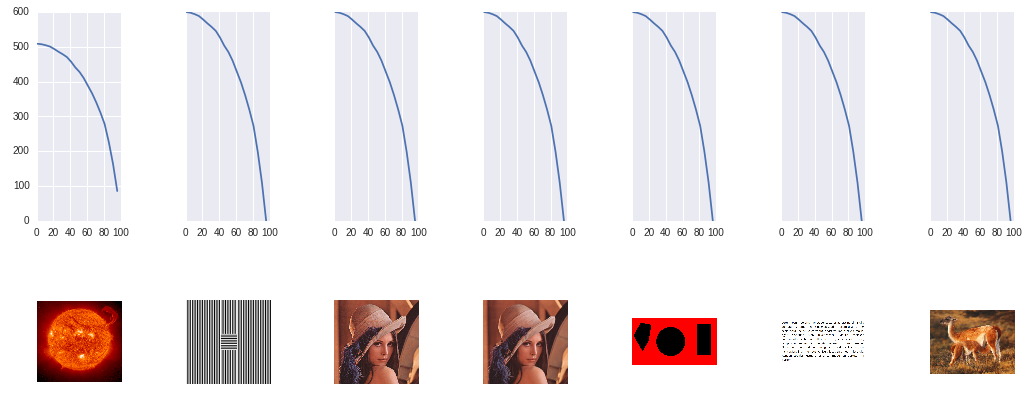

In [64]:
plt.rcParams.update({'font.size': 30})
_font_size_labes = 20
_font_size_ticks = 10
plt.figure(figsize=(15,7))

# Agregar que compartan el eje y

c_im = len(imagenes)
for k in range(c_im):
    # imagen a la cual corresponde la curva
    plt.subplot(2,c_im, c_im+k+1)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(io.imread(ruta_imagenes + imagenes[k]))
    
    # curva de compresión
    plt.subplot(2,c_im, k+1)
    if k != 0:
        plt.yticks([])
#     plt.axes().get_yaxis().set_visible(False)
    
#     plt.xlabel("factor de calidad", fontsize=_font_size_labes)
#     plt.ylabel("img_size / compressed_size", fontsize=_font_size_labes)
    plt.plot(Q_factor_values, compression_rates)
    plt.tick_params(labelsize=_font_size_ticks)
plt.tight_layout()
plt.show()